# Die Plotversuche

In [1]:
%matplotlib inline
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import numpy as np
import requests, zipfile, io #zum abspeichern von PDFs
from tqdm import tqdm # Anzeigen des aktuellen Ladestandes
import PyPDF2
import re
from os import listdir
from os.path import isfile, join
import locale
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.3


In [2]:
df=pd.read_csv("KRFrames/df_tuti_Ganzes_Frame")

In [3]:
df1= df[["VorlageNR", "Namenganz","Geschäft", "Stand", "Einreichedatum"]]

In [4]:
df2=df1.set_index(pd.DatetimeIndex(df1["Einreichedatum"]).date)
df2

,VorlageNR,Namenganz,Geschäft,Stand,Einreichedatum
2019-11-26,3031,SVP-Fraktion SVP,Interpellation der SVP-Fraktion betreffend Sic...,Einreichung,2019-11-26
2019-11-26,3030,SVP-Fraktion SVP,Motion der SVP-Fraktion betreffend Stärkung de...,Einreichung,2019-11-26
2019-11-24,3029,Alternative ALG,Interpellation der Fraktion Alternative - die ...,Einreichung,2019-11-24
2019-11-15,3026,Thomas Gander FDP,Interpellation von Markus Spörri und Thomas Ga...,Einreichung,2019-11-15
2019-11-15,3026,Markus Spörri FDP,Interpellation von Markus Spörri und Thomas Ga...,Einreichung,2019-11-15
...,...,...,...,...,...
2005-04-26,857,Karl Betschart SVP,"Motion von Heinz Tännler, Karl Betschart und H...",Datenmigration,2005-04-26
2002-12-03,836,Käty Hofer Buser SP,Interpellation von Käty Hofer Buser betreffend...,Datenmigration,2002-12-03
2002-08-13,810,Marcel Meyer CVP,Motion von Marcel Meyer betreffend Vergabe von...,Datenmigration,2002-08-13
2006-08-22,801,Hans Abicht FDP,Motion von Hans Abicht betreffend Raumkonzept ...,Datenmigration,2006-08-22


In [5]:
df33=df2.drop_duplicates("VorlageNR")

In [6]:
df3=df33.sort_index(ascending=False).head(1102)

In [7]:
df3.index= pd.to_datetime(df3.index) #nun den Index in datetime umwalndeln

In [8]:
df5=df3
df5

,VorlageNR,Namenganz,Geschäft,Stand,Einreichedatum
2019-11-26,3031,SVP-Fraktion SVP,Interpellation der SVP-Fraktion betreffend Sic...,Einreichung,2019-11-26
2019-11-26,3030,SVP-Fraktion SVP,Motion der SVP-Fraktion betreffend Stärkung de...,Einreichung,2019-11-26
2019-11-24,3029,Alternative ALG,Interpellation der Fraktion Alternative - die ...,Einreichung,2019-11-24
2019-11-15,3026,Thomas Gander FDP,Interpellation von Markus Spörri und Thomas Ga...,Einreichung,2019-11-15
2019-11-06,3024,Claus Soltermann GLP,Interpellation von Claus Soltermann und Heinz ...,Überweisung an Regierungsrat,2019-11-06
...,...,...,...,...,...
NaT,2273,Franz Hürlimann CVP,Postulat von Florian Weber und Franz Hürlimann...,Datenmigration,NaN
NaT,2175,Thomas Aeschi SVP,Interpellation von Thomas Aeschi betreffend Üb...,Datenmigration,NaN
NaT,2035,Alternative ALG,Postulat der Alternativen Grünen Fraktion und ...,Datenmigration,NaN
NaT,1817,Silvan Hotz CVP,Kleine Anfrage von Silvan Hotz betreffend Sep...,Datenmigration,NaN


# Ergebnisse
nun scheint es endlich zu stimmen. Mal schauen wie es aussieht.

In [9]:
df5["Geschäft"].resample("M").count()

1982-12-31    1
1983-01-31    0
1983-02-28    0
1983-03-31    0
1983-04-30    0
             ..
2019-07-31    6
2019-08-31    3
2019-09-30    7
2019-10-31    6
2019-11-30    5
Name: Geschäft, Length: 444, dtype: int64

# Hier das Ergebnis
Zahlen 2009 weisen (Wahljahre 2010/2011) nicht auf eine solche Veränderung hin. Die Zahlen für die Wahljahre 14/15 und 18/19 hingegen schon.
HMMM oder doch nicht - das Resutat scheint nicht so klar

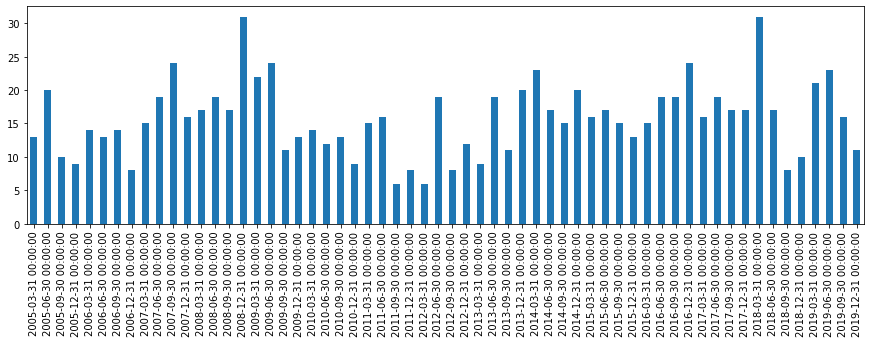

In [10]:

df5["Geschäft"].resample("Q").count()["2005":].plot(figsize=(15,4), kind="bar")

In [11]:
df5["Geschäft"].resample("A").count()["2005":]

2005-12-31    52
2006-12-31    49
2007-12-31    74
2008-12-31    84
2009-12-31    70
2010-12-31    48
2011-12-31    45
2012-12-31    45
2013-12-31    59
2014-12-31    75
2015-12-31    61
2016-12-31    77
2017-12-31    69
2018-12-31    66
2019-12-31    71
Name: Geschäft, dtype: int64

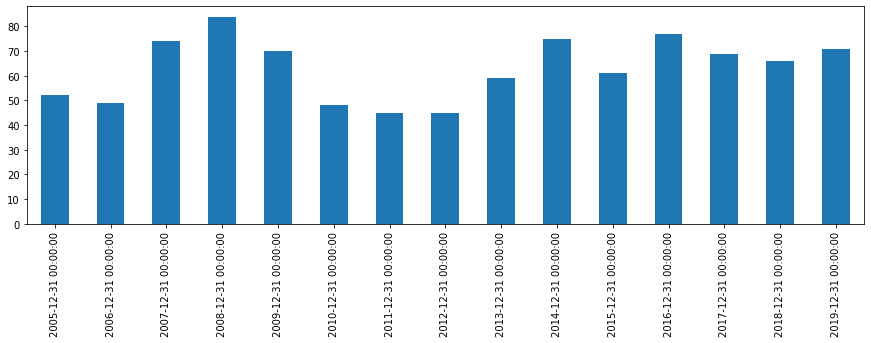

In [12]:
# so sieht der Verlauf über die Jahre hinweg aus. 2011 ein Tief und seither wieder eher konstant.
# Wobei das aktuelle Jahr ja eigentlich noch nicht zu Ende ist, und die Daten von Oktober sind. 
# 2014 war ein Spitzenjahr. 
df5["Geschäft"].resample("A").count()["2005":].plot(figsize=(15,4), kind="bar")

df5["Geschäft"].resample("Y").count()["2005":].plot(figsize=(15,4))

In [13]:
df5["Geschäft"].resample("A").count()["2005":]

2005-12-31    52
2006-12-31    49
2007-12-31    74
2008-12-31    84
2009-12-31    70
2010-12-31    48
2011-12-31    45
2012-12-31    45
2013-12-31    59
2014-12-31    75
2015-12-31    61
2016-12-31    77
2017-12-31    69
2018-12-31    66
2019-12-31    71
Name: Geschäft, dtype: int64

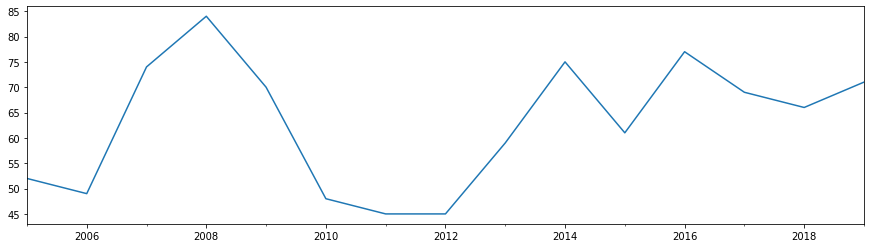

In [17]:
df5["Geschäft"].resample("A").count()["2005":].plot(figsize=(15,4))

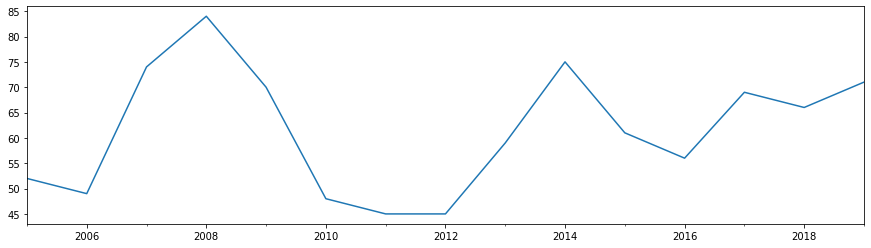

In [16]:
df5["Geschäft"][~df5["Geschäft"].str.contains("Spiess")].resample("A").count()["2005":].plot(figsize=(15,4))

In [ ]:
# Sehr gut... so siehts realistisch aus. 
# Kontrolle ergibt ebenfall ähnliche Zahlen. Abgesehen von 2011 - von dort gibt es viele Datenmigrations-Files. 
# Diese werden bei der Page des Kantons nicht aufgeführt. die restlichen Zahlen stimmem ,mit der Grafik überein.
# Nun noch die Skala so einstellen, dass sie von 0 ausgeht. Sonst wird es verwirrend. 

In [ ]:
# Ich versuche es mal mit en parteien einzeln
df_umgekehrt_m=df5.groupby("P").resample("M").count().unstack()
df_umgekehrt_q=df5.groupby("P").resample("Q").count().unstack()
df_umgekehrt_a=df5.groupby("P").resample("A").count().unstack()
df_umge=df_umgekehrt_a[["Unnamed: 0"]] #hier kann ich nun wähen welches DF. also wie resamplet
df_swi=df_umge.T #hier mache ich die Zeilen zu Spalten und umgekehrt.
df_swit=df_swi.reset_index(level=1)#ich muss irgendwie wieder den Datetime-Index haben
df_7=df_swit.set_index(pd.DatetimeIndex(df_swit["Einreichedatum"]))
df8=df_7.sort_index()

In [ ]:
df5[df5["Geschäft"].str.contains("Klima")|df5["Geschäft"].str.contains("Umwelt")]